# Video Games Sales Analysis

## Introduction
You work at the online store "Ice" which sells video games from around the world. Data regarding user and expert reviews of games, genres, platforms (e.g. Xbox or PlayStation), and historical game sales data is available from open sources. You need to identify the patterns that determine whether a game is successful or not. That way, you can find the games with the most potential and plan their ad campaigns.

In front of you is data from 2016. Let's imagine that it is December 2016 and you are planning a campaign for 2017.
(Right now, the most important thing for you is to gain experience working with data. It doesn't matter whether you forecast 2017 sales based on data from 2016 or forecast 2027 sales based on data from 2026.).

This dataset contains abbreviations. ESRB stands for Entertainment Software Rating Board, which is an independent regulatory organization that evaluates game content and gives an age rating such as Teen or Mature.

## Objective
1. Top 5 platforms. Explain the variations in market share from one region to another.
2. Top 5 genres. Explain the difference.
3. Does the ESRB rating affect sales in each region?
4. Test the hypothesis whether the average user rating of the Xbox One and PC platforms is the same.
5. Test the hypothesis whether the average user rating for the Action and Sports genres is different.

## Stage
1. Open a file
2. Pre-processing
3. Data analysis
4. User profiling
5. Test the hypothesis

## Data Description
— Name (name)

— Platforms

— Year_of_Release (release year)

— Genres

— NA_sales (North American sales in millions of USD)

— EU_sales (European sales in million USD)

— JP_sales (sales in Japan in million USD)

— Other_sales (sales in other countries in millions of USD)

— Critic_Score (review score from critics, max. 100)

— User_Score (review score from users, up to 10)

— Ratings (ESRB)

Data for 2016 may be incomplete.

#  Open File

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st


In [67]:
df = pd.read_csv('/datasets/games.csv')

In [68]:
df.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [70]:
df.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


1. There are missing values in the column name, year_of_release, genre, critic_score, user_score, and rating
2. The Year_of_release column is changed to an integer type
3. The user_score column is changed to type float
4. Column names are changed to lowercase

open file finished

# Pre-Processing

ubah kolom menjadi lowercase

In [71]:
df.columns = df.columns.str.lower()

Handling missing values

In [72]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

name

In [73]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


because the game is quite old, there is not much supporting information and the amount is small, the missing values are deleted along with the missing values in the genre column

In [74]:
df = df.dropna(subset=['name'], axis=0)
df.reset_index(drop=True, inplace=True)

year_of release

In [75]:
df[df['year_of_release'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,NaN


the most logical supporting data to fill in the missing values is the mean of the genre and platform, the mean is used because it is more logical and the value is lower than the median

In [76]:
df['year_of_release'] = df.groupby(['platform', 'genre'])['year_of_release'].apply(lambda x: x.fillna(x.mean()))

checking result

In [77]:
df['year_of_release'].isna().sum()

0

changing data type year_of_release

In [78]:
df['year_of_release'] = df['year_of_release'].astype(int)

user_score

handling tbd because it has to be changed to nan, after that it's just changed to type float

In [79]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

changing tbd into nan

In [81]:
df.loc[df['user_score'] == 'tbd', 'user_score'] = np.nan

checking result

In [82]:
df.loc[df['user_score'] == 'tbd', 'user_score'].sum()

0

changing type into float

In [84]:
df['user_score'] = df['user_score'].astype(float)

In [85]:
df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
year_of_release,1.000000,-0.093095,0.004688,-0.165601,0.038258,0.011194,-0.265702
na_sales,-0.093095,1.000000,0.765341,0.449668,0.638695,0.240755,0.086200
eu_sales,0.004688,0.765341,1.000000,0.435079,0.722796,0.220752,0.055337
jp_sales,-0.165601,0.449668,0.435079,1.000000,0.291090,0.152593,0.125598
other_sales,0.038258,0.638695,0.722796,0.291090,1.000000,0.198554,0.057119
critic_score,0.011194,0.240755,0.220752,0.152593,0.198554,1.000000,0.580878
user_score,-0.265702,0.086200,0.055337,0.125598,0.057119,0.580878,1.000000


fill in user_score with critic_score, check the correlation

In [18]:
df['user_score'].corr(df['critic_score'])

0.5808778320767237

the value is quite high, so the critic_score can be used to fill in the user_score

To fill in the value, the median is used because the median is lower than the mean

In [19]:
df['user_score'] = df.groupby('critic_score')['user_score'].apply(lambda x: x.fillna(x.median()))

In [20]:
df['user_score'].isna().sum()

8576

because there is still a missing value, try filling it in using the user_score based on the rating, with logical assumptions, if the ratings are the same then the scores are not much different

In [21]:
df['user_score'] = df.groupby('rating')['user_score'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [22]:
df['user_score'].isna().sum()

6772

because there is still a missing value, try to fill it using user_score based on name

In [23]:
df['user_score'] = df.groupby('name')['user_score'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [24]:
df['user_score'].isna().sum()

6337

critic_score

apply the same method as user_score to fill in the missing values

In [25]:
df['critic_score'] = df.groupby('rating')['critic_score'].apply(lambda x: x.fillna(x.median()))
df['critic_score'] = df.groupby('name')['critic_score'].apply(lambda x: x.fillna(x.median()))

/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1117: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/opt/conda/lib/p

In [26]:
df['critic_score'].isna().sum()

6337

rating

Fill in the missing values with name, with the value that appears the most

In [27]:
df['rating'] = df.groupby('name')['rating'].apply(lambda x: x.fillna(x.mode()))

checking result

In [28]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       6337
user_score         6337
rating             6764
dtype: int64

the remaining missing values are left alone, while there is no additional way to fill in the missing values

checking duplicated data

In [29]:
df.duplicated().sum()

0

checking data type

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16713 entries, 0 to 16712
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     10376 non-null  float64
 9   user_score       10376 non-null  float64
 10  rating           9949 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


calculating total sales

In [31]:
df['total_sales'] = df.apply(lambda x: x['na_sales'] + x['eu_sales'] + x['jp_sales'] + x['other_sales'], axis=1)

pre-processing finished

# Data analysis

how many games released in different years. Is the data in each period significant?

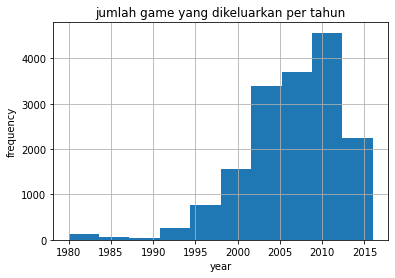

In [32]:
df.hist('year_of_release')
plt.title('jumlah game yang dikeluarkan per tahun')
plt.xlabel('year')
plt.ylabel('frequency')
plt.show()

In [33]:
df_release = df.groupby('year_of_release')['name'].count().sort_values(ascending=False).reset_index()
df_release.head()

,year_of_release,name
0,2009,1482
1,2008,1473
2,2010,1279
3,2007,1211
4,2011,1150


From histories and tables, the most games were released in 2009, and the range from 2007 to 2011 is the highest number

Choose the platform with the largest total sales and make the distribution based on data per year

In [34]:
df_sales_per_platform = df.groupby('platform')['total_sales'].sum().sort_values(ascending=False).reset_index()
df_sales_per_platform.head()

,platform,total_sales
0,PS2,1255.77
1,X360,971.42
2,PS3,939.65
3,Wii,907.51
4,DS,806.12


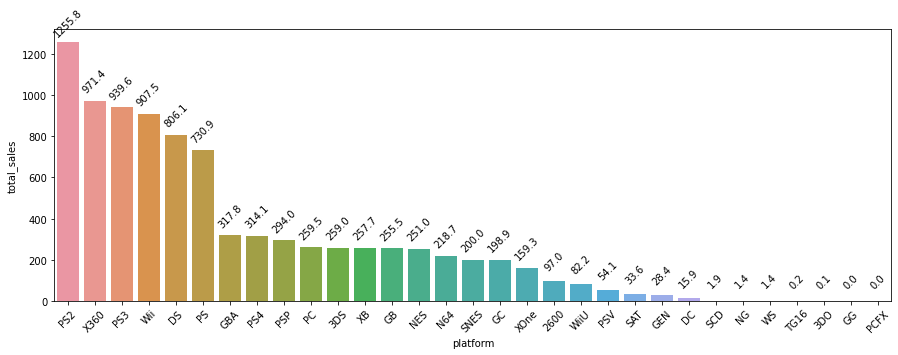

In [35]:
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_sales_per_platform, x='platform', y='total_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the biggest selling platform is PS2

Find a platform that used to be popular but now doesn't have any sales. How long does it generally take for new platforms to emerge and old platforms to fade in popularity?

From the barchart there are platforms PS, DS, Wii, PS2, PS3, X360 which have the highest sales which can be assumed to be also popular, of these 6 platforms will be used to answer the question above

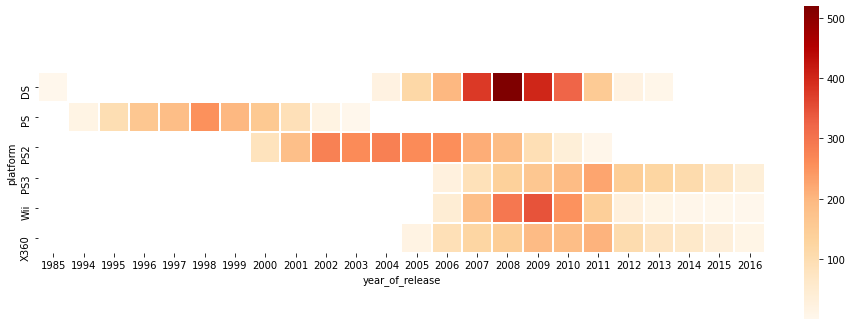

In [36]:
df_top_platform = df[df['platform'].isin(['PS','DS','Wii','PS2','PS3','X360'])].groupby(["platform","year_of_release"]).size().unstack()
plt.figure(figsize=(14,10))
g = sns.heatmap(
    df_top_platform, 
    square=True, # make cells square
    cbar_kws={'fraction' : 0.02}, # shrink colour bar
    cmap='OrRd', # use orange/red colour map
    linewidth=1 # space between cells
)


1. From the heatmap table, DS, PS, and PS2 used to be popular, but declined until they didn't have any sales
2. From the heatmap, the platform life span is around 10-12 years
3. generally from the start, it takes 3-5 years to reach the peak of popularity of a platform, and then decline

Determine the time period for data collection. To do this, look at your answers to the previous questions. The data you capture should allow you to build a benchmark for 2017.

because generally it takes 3-5 years for a platform from emergence to become popular, so to make a 2017 reference the last 5 years data will be used

In [37]:
df_asik = df[df['year_of_release'] >= 2012]

Which platforms have the most sales?

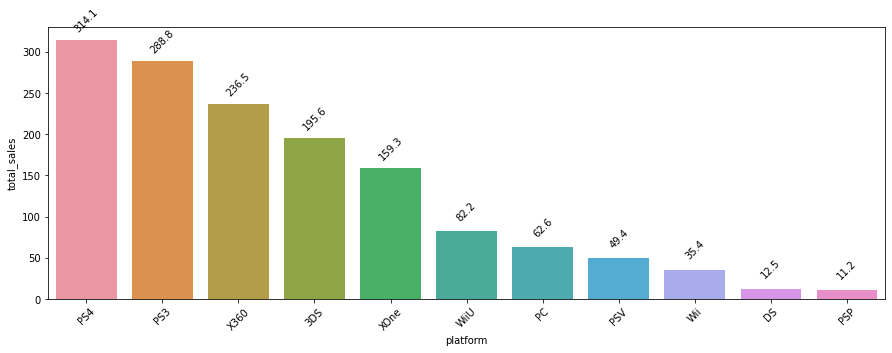

In [38]:
df_top_sales = df_asik.groupby('platform')['total_sales'].sum().reset_index().sort_values(by='total_sales', ascending=False)
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_top_sales, x='platform', y='total_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

top 5 most selling PS4, PS3, X360, 3DS, XOne

Which platforms are growing or shrinking? Choose several platforms that have the potential to generate profits

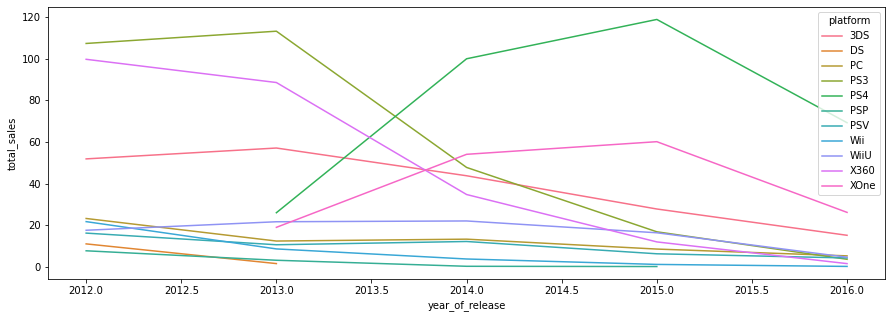

In [39]:
df_platform_sales = df_asik.groupby(['platform','year_of_release'])['total_sales'].sum().reset_index()
plt.figure(figsize=(15,5))
ax = sns.lineplot(data=df_platform_sales, x="year_of_release", y="total_sales",hue="platform")

the platforms that grew through 2015 were the PS4 and XOne, while the ones that shrank were the X360, PS3, and other platforms. platforms that still have the potential to generate profits are PS4, XOne, and 3DS

Construct a boxplot for the global sales of all games grouped by platform. Is the difference in sales significant? What about the average sales on various platforms? Describe your discovery.

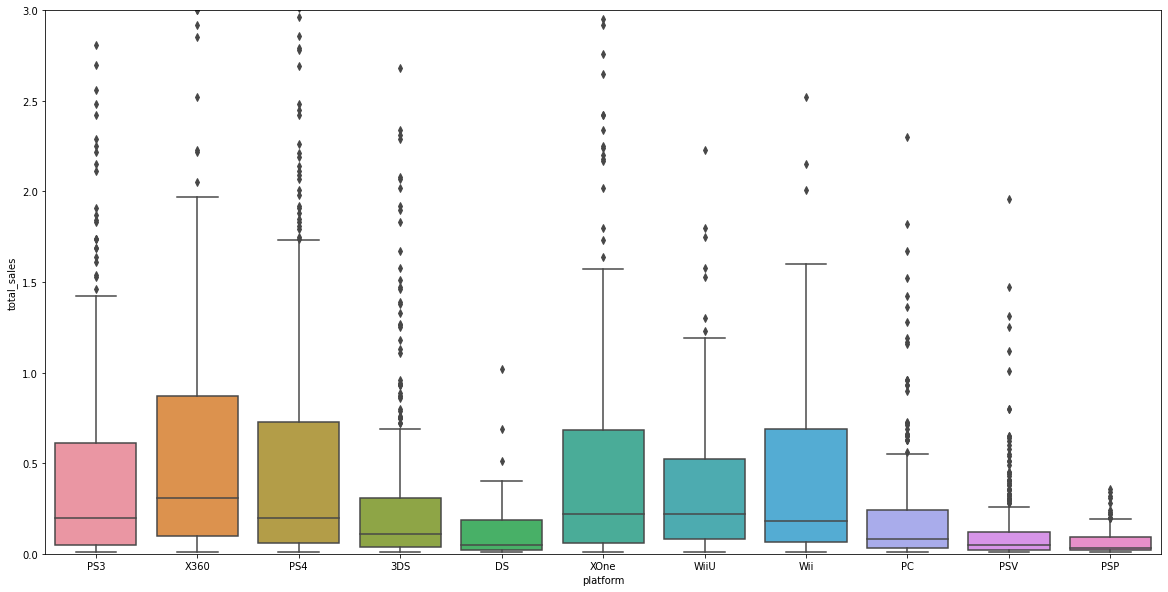

In [40]:
plt.figure(figsize=(20,10))
plt.ylim(0,3)
sns.boxplot(x='platform', y='total_sales', data=df_asik)
plt.show()

nothing too significant

In [41]:
df_asik.groupby('platform')['total_sales'].mean().sort_values(ascending=False).reset_index()

,platform,total_sales
0,X360,0.810068
1,PS4,0.801378
2,Wii,0.655000
3,XOne,0.645020
4,PS3,0.585781
5,WiiU,0.559116
6,3DS,0.486667
7,DS,0.404839
8,PC,0.250600
9,PSV,0.120000


boxplot shows sales per platform and table shows average sales. It can be seen from the boxplot that most of the mean is greater than the median. From the boxplot it can also be seen that it is in the form of a tail and can be assumed to be an outlier, but in game sales, it is very logical to produce games that generate sales above normal, so the available data will not be deleted. The 5 biggest sales are on X360, PS4, Wii, XOne, PS3.

how user and professional reviews affect sales on one of the popular platforms (which you choose). Make a scatter plot and calculate the correlation between reviews and sales. Draw the conclusion.

PS4 platform selected

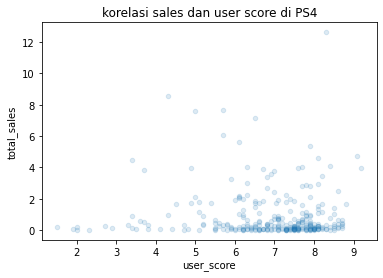

In [42]:
ps4 = df[df['platform'] == 'PS4']
ps4.plot.scatter(y='total_sales', x='user_score', alpha=.15)
plt.title('korelasi sales dan user score di PS4')
plt.show()

In [43]:
ps4['total_sales'].corr(ps4['user_score'])

-0.04056366520809139

From the scatter plot and correlation values, it appears that there is a very weak relationship between sales and users

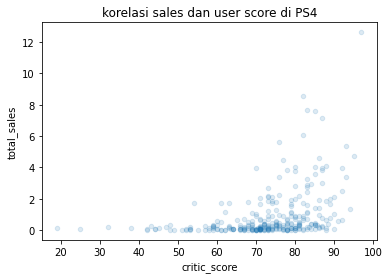

In [44]:
ps4.plot.scatter(y='total_sales', x='critic_score', alpha=.15)
plt.title('korelasi sales dan user score di PS4')
plt.show()

In [45]:
ps4['total_sales'].corr(ps4['critic_score'])

0.3855973023688268

From the scatter plot and correlation values, it appears that there is a relationship, but it is not significant between sales and critics, so even though it is not significant, the opinions of critics are still valuable.

compare the sales of the same game on other platforms

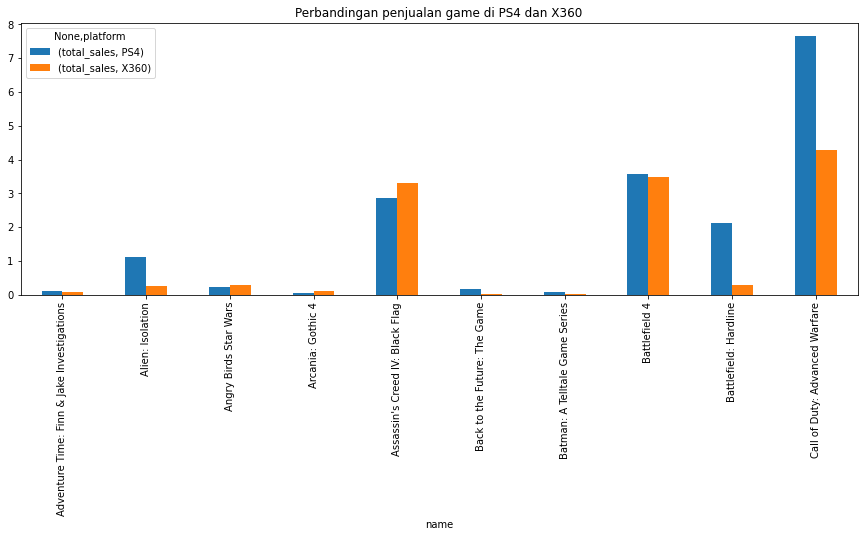

In [46]:
df_top2 = df[df['platform'].isin(['PS4', 'X360'])]
(df_top2.pivot_table(index=['name','platform'], values='total_sales', aggfunc='sum')
                        .sort_values(by='total_sales', ascending=False).unstack(1).dropna()[0:10].plot(kind='bar', figsize=(15,5)))
plt.title('Perbandingan penjualan game di PS4 dan X360')
plt.show()

From the barchart, it can be seen that sales of the same type of games on one platform are not too significant compared to other platforms

Observe the general distribution of games by genre. What can we conclude about the most profitable genres? Can you generalize about genres with high and low sales?

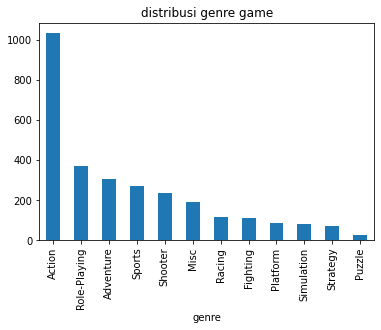

In [47]:
df_asik.groupby('genre')['genre'].count().sort_values(ascending=False).plot(kind='bar')
plt.title('distribusi genre game')
plt.show()

The best-selling game genre is action games, quite significantly

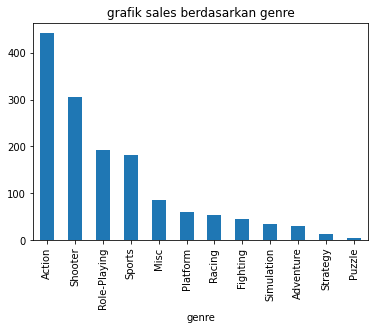

In [48]:
df_asik.groupby('genre')['total_sales'].sum().sort_values(ascending=False).plot(kind='bar')
plt.title('grafik sales berdasarkan genre')
plt.show()

because the genre distribution graph and the sales graph for the genre are similar, it can be concluded that the genre distribution shows high and low sales. The top 2 sales by genre, namely action and role playing are also in the top 2 genre distributions, the bottom 2 are strategy and puzzle are also in the bottom genre distribution

data analysis finished

# User Profiling

Top 5 platforms. Explain the variations in market share from one region to another.

NA area

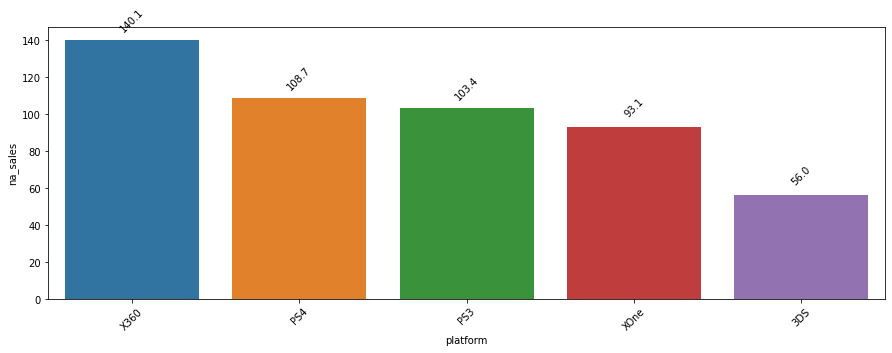

In [49]:
df_NA5 = df_asik.groupby('platform')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_NA5, x='platform', y='na_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the biggest selling platform for NA region is X360, followed by PS4 and PS3

 EU area

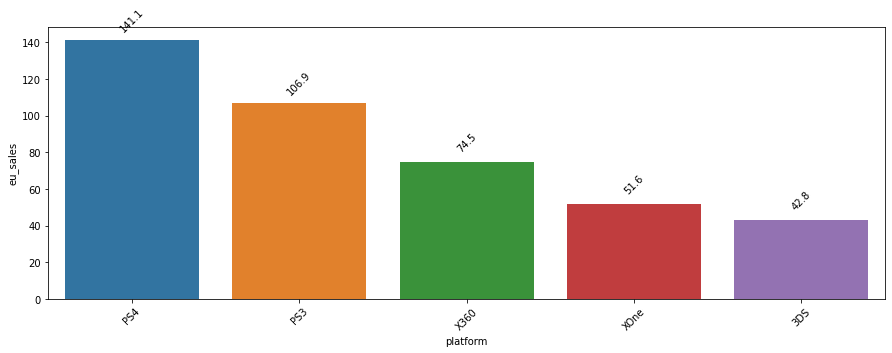

In [50]:
df_EU5 = df_asik.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_EU5, x='platform', y='eu_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

The biggest sales platform for the EU region is PS4, followed by PS3 and X360

JP area

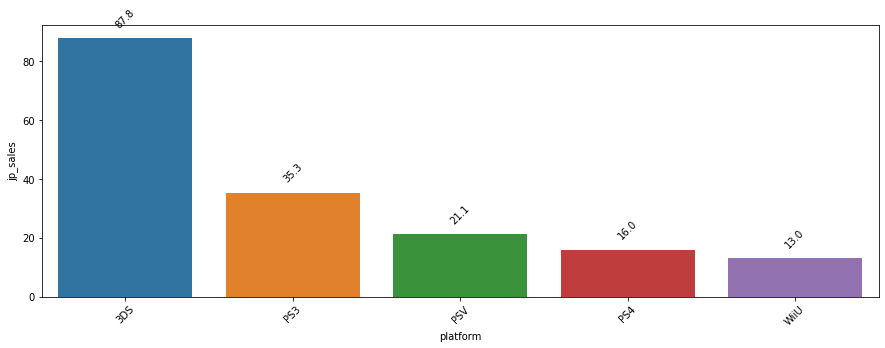

In [51]:
df_JP5 = df_asik.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_JP5, x='platform', y='jp_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

The biggest selling platform for the JP area is the 3DS, followed by the PS3 and PSV

unlike in america and europe, in japan the 3ds platform is only ranked 5th in both areas is ranked 1st

Top 5 genres. Explain the difference.

NA area

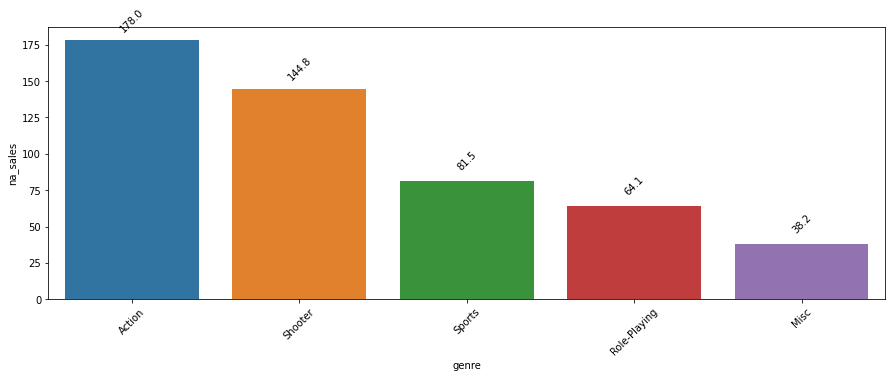

In [52]:
df_genre_na = df_asik.groupby('genre')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_genre_na, x='genre', y='na_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the top-selling genre in NA is action, followed by shooters and sports

EU area

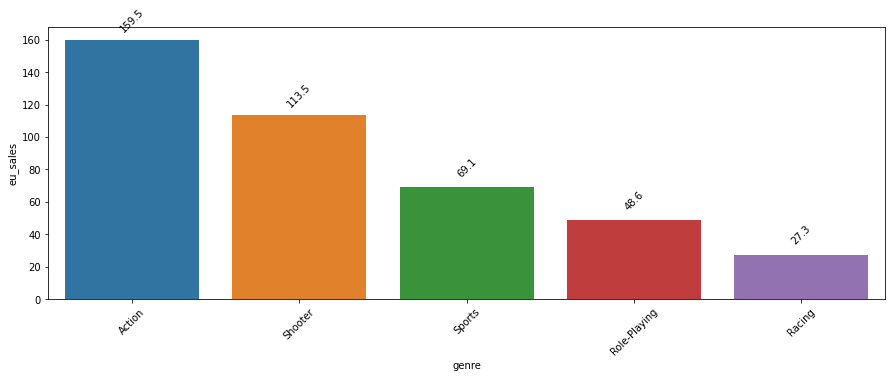

In [53]:
df_genre_eu = df_asik.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_genre_eu, x='genre', y='eu_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the top-selling genre in the EU is action, followed by shooters and sports

JP area

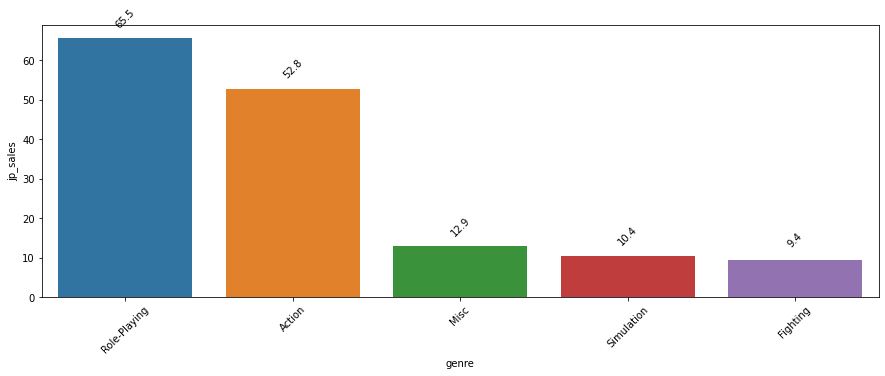

In [54]:
df_genre_jp = df_asik.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_genre_jp, x='genre', y='jp_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the top-selling genre on JP is role-playing, followed by action and Misc

Just like sales, for genres in Japan there are also market differences, where role-playing is best selling

Does the ESRB rating affect sales in each region

NA area

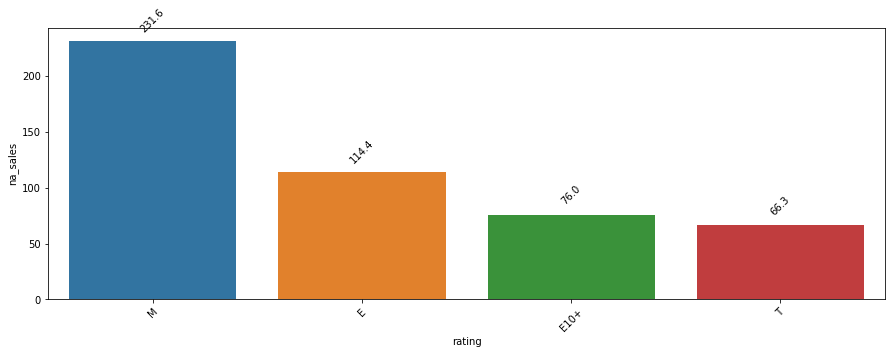

In [55]:
df_esrb_na = df_asik.groupby('rating')['na_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_esrb_na, x='rating', y='na_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the best-selling rating in NA is M followed by E and E10+

EU area

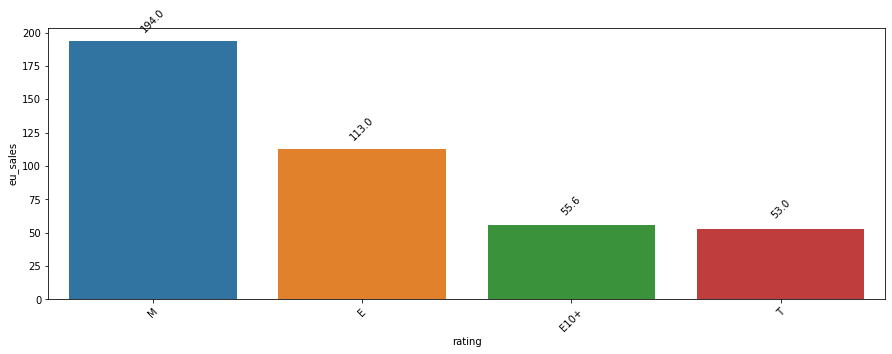

In [56]:
df_esrb_eu = df_asik.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_esrb_eu, x='rating', y='eu_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the best-selling rating in the EU is M followed by E and E10+

JP area

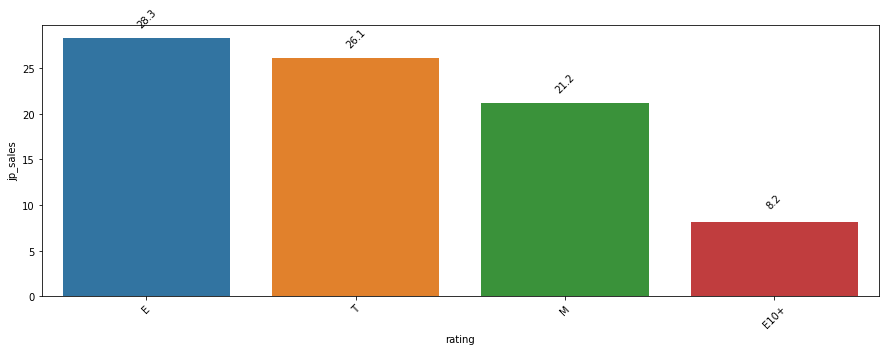

In [57]:
df_esrb_jp = df_asik.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).reset_index().head()
plt.figure(figsize=(15,5))
splot = sns.barplot(data=df_esrb_jp, x='rating', y='jp_sales')
for g in splot.patches:
    splot.annotate(format(g.get_height(), '.1f'),
                   (g.get_x() + g.get_width() / 2., g.get_height()),
                   ha = 'center', va = 'center', 
                   xytext = (0, 20), rotation=45, 
                   textcoords = 'offset points')
plt.xticks(rotation = 45) 
plt.show()

the best-selling rating on JP is E followed by T and M

JP again shows the uniqueness of its market where the best selling is rating E

The conclusion from the profile is that the NA and EU markets have many similarities both in terms of platforms used, preferred genres and esrb ratings, while the JP market has its own uniqueness in terms of platforms, genres and ratings.

User profiling finished

# Hypothesis testing

Test 1. The average user rating for the Xbox One and PC platforms is the same

In [58]:
df_asik['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'DS', 'XOne', 'WiiU', 'Wii', 'PC',
       'PSV', 'PSP'], dtype=object)

H0: the average user rating for the Xbox One and PC platforms is the same
    
H1: the average user rating for the Xbox One and PC platforms is different
    
alpha: 0.05

In [59]:
df_xone = df_asik.loc[df_asik['platform'] == 'XOne', 'user_score'].dropna()
df_pc = df_asik.loc[df_asik['platform'] == 'PC', 'user_score'].dropna()
alpha = 0.05

In [60]:
results = st.ttest_ind(df_xone,df_pc,equal_var=False)

print('p-value:', results.pvalue)

if np.all(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 0.0613817889045463
We can't reject the null hypothesis


The results of the analysis show that the average user rating for the Xbox One and PC platforms is the same

Test 2. The average user rating for the Action and Sports genres is different

In [61]:
df_asik['genre'].unique()

array(['Action', 'Shooter', 'Role-Playing', 'Platform', 'Misc',
       'Simulation', 'Sports', 'Fighting', 'Racing', 'Strategy',
       'Adventure', 'Puzzle'], dtype=object)

H0: the average user rating for Action and sport genres is the same
    
H1: the average user rating for Action and sport genres is different
    
alpha: 0.05

In [62]:
df_action = df_asik.loc[df_asik['genre'] == 'Action', 'user_score'].dropna()
df_sports = df_asik.loc[df_asik['genre'] == 'Sports', 'user_score'].dropna()
alpha = 0.05

In [63]:
results = st.ttest_ind(df_action,df_sports,equal_var=False)

print('p-value:', results.pvalue)

if np.all(results.pvalue < alpha):
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis")

p-value: 1.8233363876105193e-11
We reject the null hypothesis


The results of the analysis show that the average user rating for the Action and Sports genres is different

hypothesis testing finished

## Conclusion

Data preparation:
the data is opened and studied, then fixes the column, fixes the data type, resolves missing values, checks for duplicates, and finally creates a total sales column.

From the data analysis, it can be concluded that:
1. the most games released in 2009, and the range from 2007 to 2011 is the highest number
2. DS, PS, and PS2 used to be popular, but have since fallen to the point where they don't have any sales
3. Platform life span ranges from 10-12 years
4. generally from the time of emergence, it takes 3-5 years to reach the peak of popularity of a platform, and then decline
5. For the 2017 projection, data for the last 5 years is used, namely since 2012
6. since 2012, the top 5 most sales of PS4, PS3, X360, 3DS, XOne
7. The platforms that grew until 2015 were PS4 and XOne, while those that shrank were X360, PS3 and other platforms. platforms that still have the potential to generate profits are PS4, XOne, and 3DS

From user profiling, conclusions are obtained:
1. The NA and EU markets have many similarities in terms of platforms used, preferred genres and esrb ratings, while the JP markets have their own uniqueness in terms of platforms, genres and ratings

From the hypothesis test, it can be concluded that:
1. The average user rating for the Xbox One and PC platforms is the same
2. The average user rating for the Action and Sports genres is different